## Pooling Layer

In [1]:
%run './init.py'
%matplotlib inline

In [2]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

The goal of the pooling layer is to **subsample** the input in order to reduce the computational load, memory usage and the number of paramaters (reducing overfitting).

Each neuron in a pooling layer is connected to the outputs of a limited number neurons in the previous layer located in what's called **kernel**. Similar to convolutional layer, we must define the kernel size, the stride and the padding type.

Neurons in pooling layer have no weights, the job of these neurons is aggregate the inputs using some aggregation function like **max** (max pooling layer) or **mean** (average pooling layer).

Pooling layer typically works on every input channel independently, so he output depth is the same as the input depth. However, we can apply pooling for a specific channel and keep other channels unchanged.

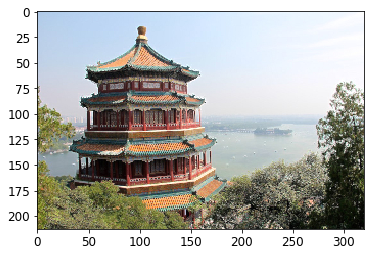

In [3]:
# https://www.tensorflow.org/api_docs/python/tf/nn/max_pool
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

plot_image(output[0].astype(np.uint8))

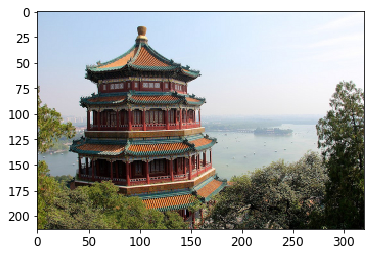

In [4]:
# https://www.tensorflow.org/api_docs/python/tf/nn/avg_pool
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.avg_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

plot_image(output[0].astype(np.uint8))